In [4]:
import numpy as np
import pandas as pd

# 讀取資料
train_data = pd.read_csv("../input/train.csv")
# 前十筆資料
train_data.head(10)
# 後十筆資料
train_data.tail(10)
# 資料資訊，可檢查缺項
train_data.info()
train_data.describe()
# 計算 NA 個數並列出
naCount = train_data.isnull().sum()
naCount[naCount > 0]
# skewness https://zh.wikipedia.org/wiki/偏度
# 偏度=0 是完美的對稱性
# 負偏態或左偏態：左側的尾部更長，分布的主體集中在右側。
# 正偏態或右偏態：右側的尾部更長，分布的主體集中在左側。
train_data.skew()
# skewness > 0.75 可用 log(1+x) 使之較對稱
x_origin = train_data["Age"]
x = np.log1p(x_origin)
x_origin = np.expm1(x)

# 峰度（Kurtosis）
# 常態分佈的峰度為 3
# 峰度大於 3 的稱作尖峰，表示資料的分佈比常態分佈更集中和陡峭。
# 峰度小於 3 的作為平峰型，表示資料分佈比之正態分佈更為平滑
train_data.kurtosis()

# 移除特定欄位
train_data.drop(['PassengerId', 'Survived'], axis='columns')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
from sklearn.model_selection import GridSearchCV

# 挑選參數
def param_selection(clf, X, y, nfolds):
    max_features = ['sqrt', 'auto', 'log2']
    max_depth = range(1, 30, 5)
    min_samples_split = range(2, 10, 2)
    min_samples_leaf = range(1, 10, 2)
    param_grid = {'max_features': max_features, 
                  'max_depth' : max_depth, 
                  'min_samples_split' : min_samples_split,
                 'min_samples_leaf' : min_samples_leaf,}
    grid_search = GridSearchCV(clf, param_grid, cv=nfolds)
    grid_search.fit(X, y)

    return grid_search.best_estimator_, grid_search.best_score_, grid_search.best_params_

In [6]:
# 演算法評估
from sklearn.model_selection import cross_val_score  
import seaborn as sns

def evaluate_model(clf, X, y):
    # 5-Fold Cross Validation
    scores = cross_val_score(clf, X, y, cv=10, scoring="neg_mean_squared_error")
    # 平均埴
    m = scores.mean()
    # 標準差
    sd = scores.std()
    
    # 訓練資料準確度
    clf.fit(X, y)
    score = clf.score(X, y)
    
    # 中位數
    ax = sns.boxplot(scores)
    ax.set_title("val_mean:{:.5f}, val_std:{:.5f}\ntrain_score:{:.2f}\n\nclf:{}".format(m, sd, score, clf))
    
    return clf

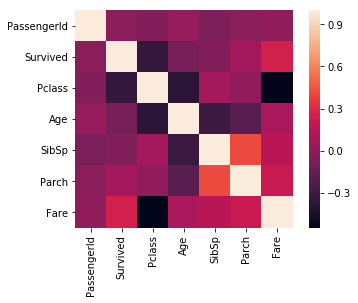

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# 計算相關性
corrmat = train_data.corr()
# 畫圖
sns.heatmap(corrmat, square=True)
# 顯示圖片
plt.show()

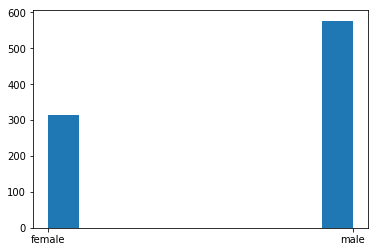

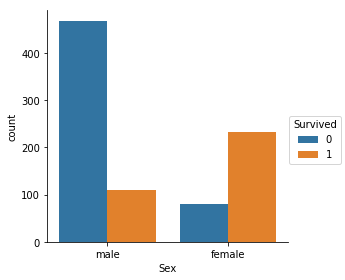

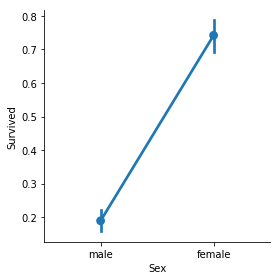

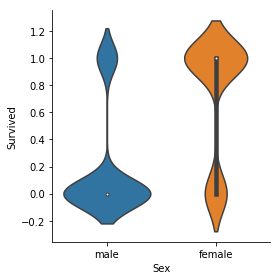

In [8]:
# 離散資料
import matplotlib.pyplot as plt
import seaborn as sns

label = 'Sex'
resultLabel = "Survived"
# 畫出直方圖
data = train_data[label]
plt.hist(data)

# seaborn 會自動移除 NaN 值，需注意
# 畫出直方圖
sns.factorplot(label, hue=resultLabel, data=train_data, kind="count")
# 顯示中心值與信賴區間
sns.factorplot(label, resultLabel, data=train_data, kind="point")
# 顯示中位數與四分位距
sns.factorplot(label, resultLabel, data=train_data, kind="violin")
plt.show()

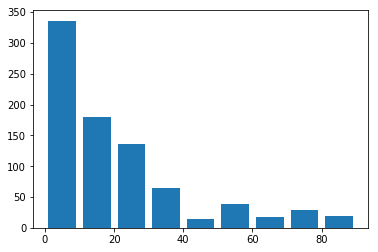

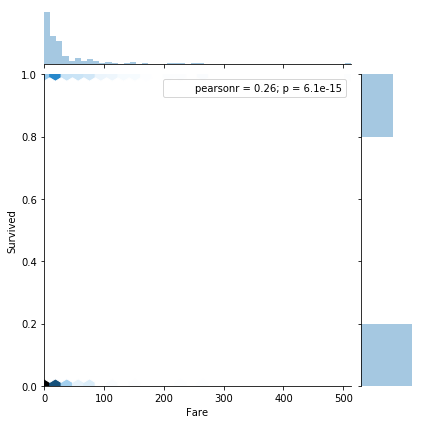

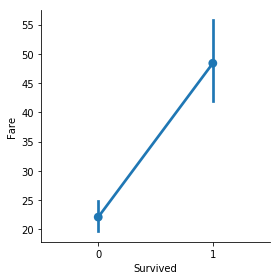

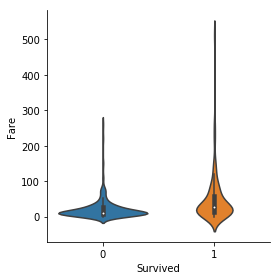

In [9]:
# 連續資料
import matplotlib.pyplot as plt
import seaborn as sns

label = 'Fare'
resultLabel = "Survived"
# 畫出直方圖
# 移除 NA 值
data = train_data[label].dropna(how='any')
plt.hist(data, bins=range(0,100,10), rwidth=0.8)

# seaborn 會自動移除 NaN 值，需注意
# 畫出相關性的圖
sns.jointplot(label, resultLabel, data=train_data, kind='hex')
# 顯示中心值與信賴區間
sns.factorplot(resultLabel, label, data=train_data, kind="point")
# 顯示中位數與四分位距
sns.factorplot(resultLabel, label, data=train_data, kind="violin")

plt.show()

In [10]:
# 缺項處理
def fillNA(XX):
    X = XX.copy(deep=True)
    for colName in X.columns:
        if sum(X[colName].isnull()) > 0:
            if X.dtypes[colName] in [np.int64, np.float64]:
                # print("{} is filled by {}".format(colName, X[colName].mean()))
                X[colName] = X[colName].fillna(X[colName].mean())
            elif X.dtypes[colName] in [object]:
                # print("{} is filled by NA".format(colName))
                fillVal = "NA"# X[colName].value_counts().index[0]
                X[colName] = X[colName].fillna(fillVal)
            else:
                print("{} is not define".format(colName))
    return X


In [11]:
# 資料轉換
from sklearn import preprocessing

# 編碼為 1 2 3 ...
def transSymbolEncoder(x):
    lb = preprocessing.LabelEncoder()
    lb.fit(x)
    return lb.transform(x)

# 編碼為 001 010 100 ... 
# 可用 pd.get_dummies(XX) 取代
def transSymbolBinary(XX, colName):
    X = XX
    x = X[colName].fillna("NA")
    lb = preprocessing.LabelBinarizer()
    lb.fit(x)
    value = lb.transform(x)
    for i in range(len(value[0])):
        addName = "{}_{}".format(colName, lb.classes_[i])
        X[addName] = value[:, i]

    return X.drop([colName], axis='columns')

def transAll(XX):
    X = XX.copy(deep=True)
    for colName in X.columns:
        if X.dtypes[colName] in [np.int64, np.float64]:
            # print("{} is not transformed".format(colName))
            # X[colName] = (X[colName] - X[colName].mean()) / X[colName].std()
            pass
        elif X.dtypes[colName] in [object]:
            # print("{} is transformed".format(colName))
            X = transSymbolBinary(X, colName)
        else:
            print("{} is not define".format(colName))
    
    return X

In [12]:
# 列出重要的 feature
import numpy as np
import matplotlib.pyplot as plt

def listImportantIndex(indices, importances, threhold):
    '''
    indices : features 名字
    importances : feature 重要性 
    threhold : 大於才會挑選
    '''
    # 取絕對值，以符合 linear model 的權重
    importances_abs = abs(importances)
    # 由小到大排序並回傳對應的 index，再將之反向，也就是改為由大到小的排序
    indices_sorted = np.argsort(importances_abs)[::-1]
    # 印出的個數
    n = sum(importances_abs > threhold)

    # 畫直方圖
    plt.barh(range(n), importances[indices_sorted[:n]], align="center")
    plt.yticks(range(n), indices[indices_sorted[:n]])
    plt.show()

    # 印出排序後的 feature 重要性
    print("Feature ranking:")
    for f in range(n):
        print("%d. feature %s (%f)" % (f + 1, indices[indices_sorted[f]], importances[indices_sorted[f]]))

    return indices[indices_sorted[:n]]

In [15]:
# 合併重要 features
import pandas as pd

def combinIndex(*args):
    result = pd.Index([])
    for index in args:
        result = result.union(index)
    
    return result